# Axis limits

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4.5) # To set teh plot figure size
%config InlineBackend.figure_format = 'retina'

pokemon = pd.read_csv("pokemon.csv")
print(pokemon.shape)
pokemon.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


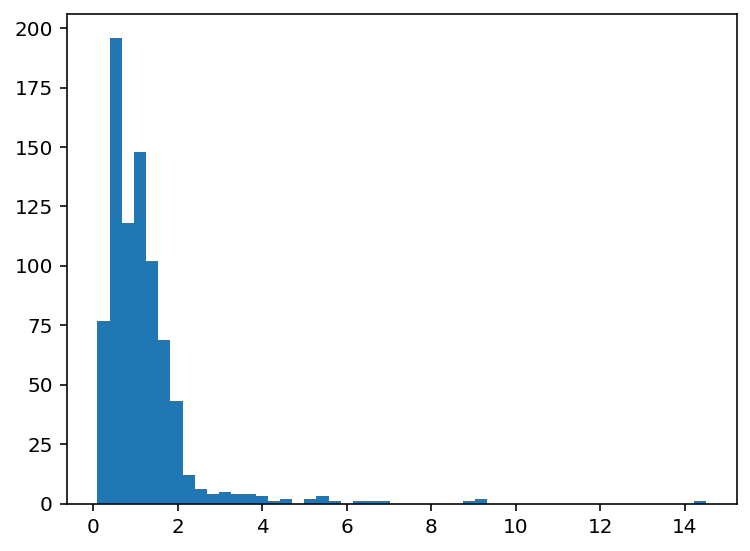

In [10]:
plt.hist(data=pokemon, x='height', bins=50);

Set Axis limits using **xlim** to zoom in the section we need. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range.

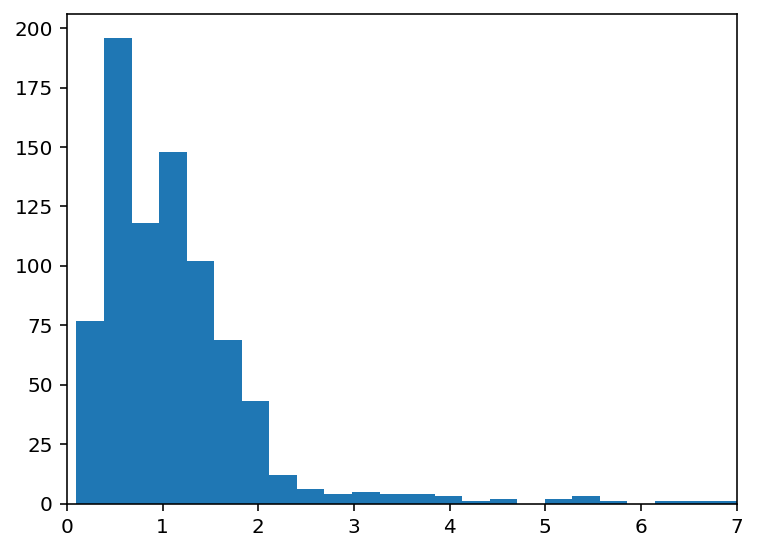

In [8]:
plt.hist(data=pokemon, x='height', bins=50);
plt.xlim([0, 7]);

# Scale and Axis Transformation

### 1. Log transformation

Be aware that a logarithmic transformation is not the only one possible. 
* When we perform a logarithmic transformation, our data values have to all be positive; 
* it's impossible to take a log of zero or a negative number. 
* In addition, the transformation implies that additive steps on the log scale will result in **multiplicative changes** in the natural scale, an important implication when it comes to data modeling. 

Examples of places where log-normal distributions have been observed: https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications

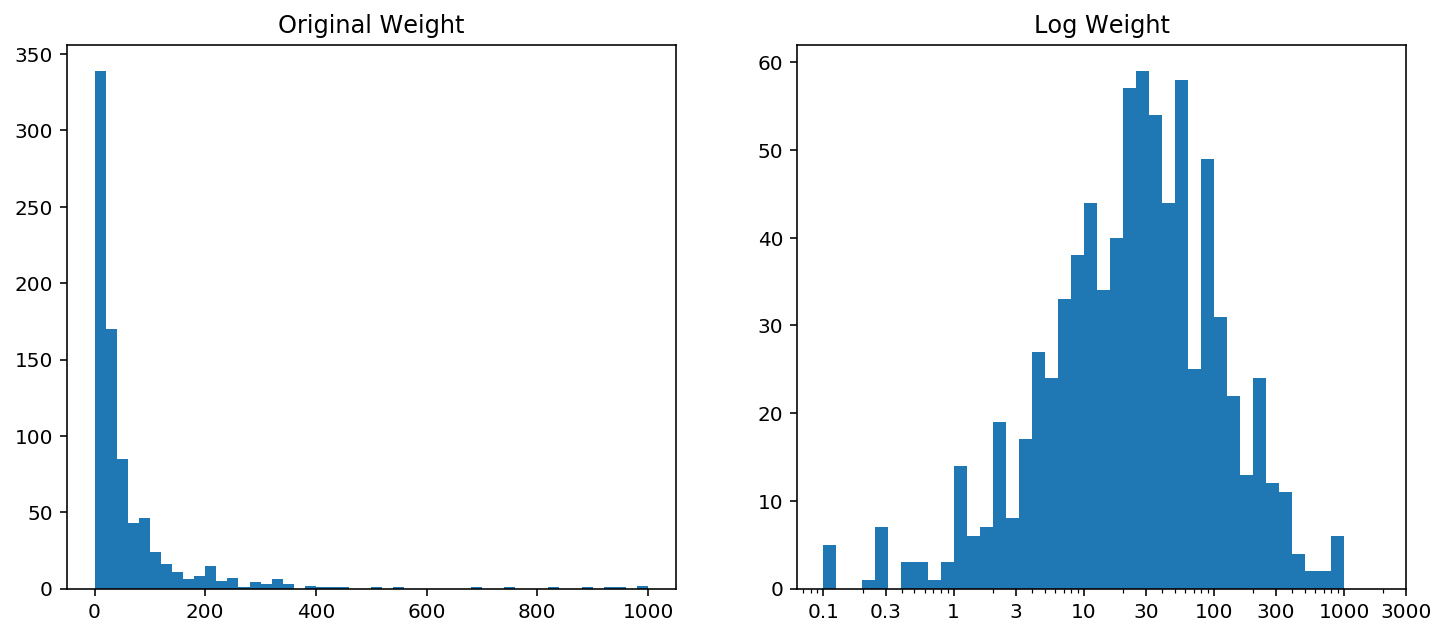

In [7]:
plt.figure(figsize=[12,5])

# Original weight plot
plt.subplot(1,2,1)
plt.title('Original Weight')
plt.hist(data=pokemon, x='weight', bins=50);

# logarithm plot
plt.subplot(1,2,2)
plt.title('Log Weight')

# change bins to reflect log scale
min_val = np.log10(pokemon['weight']).min()
max_val = np.log10(pokemon['weight']).max()
bins = 10 ** np.arange(min_val, max_val+0.1, 0.1)  # y = 10^x -> log base 10
plt.hist(data=pokemon, x='weight', bins=bins);

# add ticks to have more interpretable log scale values
# powers of 3 is a halfway between consecutive powers of 10 in log scale
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

# Transform the data to log scale
plt.xscale('log')
plt.xticks(ticks, labels);

In the plot on the left, the few data points with value above 1000 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of *1-3-10* or *1-2-5-10* are very useful for base-10 log transforms.

It is important that the **xticks are specified after xscale** since that function has its own built-in tick settings.

In [20]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [21]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

### Alternate transformations:

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by **writing a function that applies both the transformation and its inverse**. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. 

### 2. Square root:

For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation.

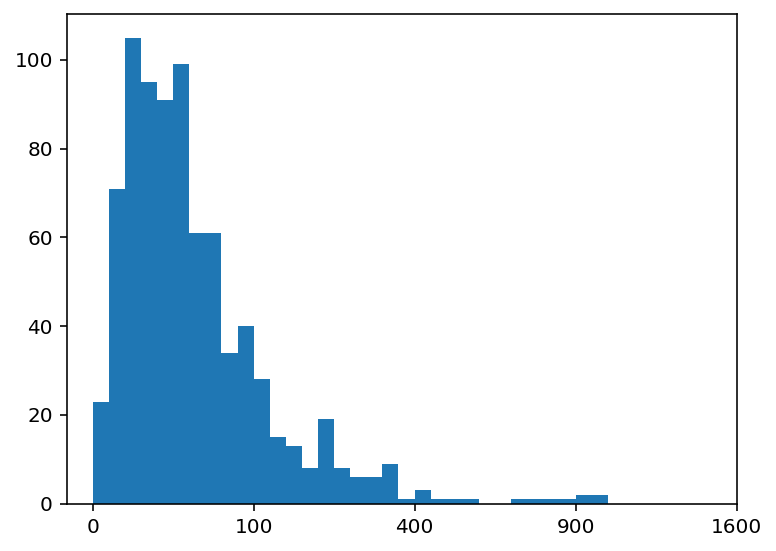

In [9]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

data = pokemon['weight']
bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));